In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
import plotly.express as px 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns
import pickle 



In [2]:
df2 = pd.read_csv('df2.csv')
df2.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


### Sélection de modele

In [3]:
X = df2.drop('price', axis=1) # X : ma database sans le prix
y = df2.price # y : prix = target

Séparation de la database en train(80%) et test(20%)

In [4]:
X_train, X_test,y_train , y_test = train_test_split(X, y, test_size=0.2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (17290, 23)
Test set: (4323, 23)


In [5]:
num_col = list(X.select_dtypes(include=[float,int]).columns) # liste avec les colonnes en decimale et en intiers
cat_col = list(X.select_dtypes(include=[object]).columns)  # # liste avec les colonnes object

In [6]:
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())

In [7]:
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [8]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression()) # régresion lineaire

In [9]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso()) # 

In [10]:
my_pipe_ridge = make_pipeline(preprocessing, Ridge())

In [11]:
my_pipe_elastic = make_pipeline(preprocessing, ElasticNet())

Régularisation Lasso

In [12]:
my_pipe_lasso.fit(X_train, y_train)

/home/rapsw/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+14, tolerance: 2.365e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['Unnamed: 0', 'id',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month', 'day'])])),
                ('lasso', Lasso())])

In [13]:
my_pipe_lasso.score(X_test, y_test)

0.8211375861925161

Régresion  Lineare

In [14]:
my_pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['Unnamed: 0', 'id',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month', 'day'])])),
                ('linearregression', LinearRegression())])

In [15]:
my_pipe_lr.score(X_test, y_test)

0.8209867986871688

Régularisation Ridge

In [16]:
my_pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['Unnamed: 0', 'id',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month', 'day'])])),
                ('ridge', Ridge())])

In [17]:
my_pipe_ridge.score(X_test, y_test)

0.8211590088897371

Régularisation ElasticNet

In [18]:
my_pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['Unnamed: 0', 'id',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month', 'day'])])),
                ('elasticnet', ElasticNet())])

In [19]:
my_pipe_elastic.score(X_test, y_test)

0.7971516101361789

Hypermarametres 

In [20]:
my_pipe_ridge.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot', OneHotEncoder(), []),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['Unnamed: 0', 'id', 'bedrooms', 'bathrooms',
                                     'sqft_living', 'sqft_lot', 'floors',
                                     'waterfront', 'view', 'condition', 'grade',
                                     'sqft_above', 'sqft_basement', 'yr_built',
                                     'yr_renovated', 'zipcode', 'lat', 'long',
                                     'sqft_living15', 'sqft_lot15', 'year',
                                     'month', 'day'])])),
  ('ridg

In [21]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [22]:
hyperparametres = {'ridge__alpha': [0.01,0.1, 0.2,0.5, 1,10]}

In [23]:
random_search = GridSearchCV(my_pipe_ridge, hyperparametres, cv=3)

In [24]:
random_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(),
                                                                         []),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'id',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'sqft_lot',
                                                                          'floors',
                                                                          'waterfront',
                                                                          'view',
                                                                          'condition',
                                                                          'grade',
                                                                          'sqft_above',
                                                                          'sqft_basement',
                                                                          'yr_built',
                                                                          'yr_renovated',
                                                                          'zipcode',
                                                                          'lat',
                                                                          'long',
                                                                          'sqft_living15',
                                                                          'sqft_lot15',
                                                                          'year',
                                                                          'month',
                                                                          'day'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 0.2, 0.5, 1, 10]})

In [25]:
random_search.best_params_

{'ridge__alpha': 0.01}

In [26]:
my_pipe_ridge.set_params(**random_search.best_params_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['Unnamed: 0', 'id',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month', 'day'])])),
                ('ridge', Ridge(alpha=0.01))])

In [27]:
my_pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['Unnamed: 0', 'id',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month', 'day'])])),
                ('ridge', Ridge(alpha=0.01))])

In [28]:
my_pipe_ridge.score(X_test, y_test)

0.8209983420887469

In [32]:
# prédiction

y_pred = my_pipe_ridge.predict(X_train)

Residual

In [34]:
residual = (y_train - y_pred).abs().sort_values()

In [35]:
to_drop = residual[residual > 500000].index

In [36]:
df2_cleaned = df2.drop(to_drop)

In [37]:
df2_cleaned

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


/home/rapsw/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


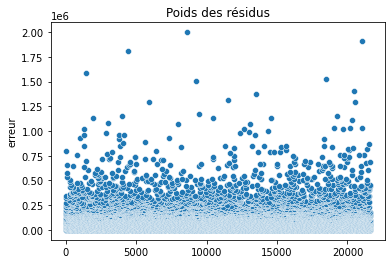

In [39]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [40]:
df2[df2.bedrooms == 33]

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
15870,15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,...,1947,0,98103,47.6878,-122.331,1330,4700,2014,6,25


In [41]:
residual[residual.index == 15870]

15870    10876.978687
Name: price, dtype: float64

In [42]:
X = df2_cleaned.drop('price', axis=1)
y = df2_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [43]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())
my_pipe_lasso.fit(X_train, y_train)

/home/rapsw/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+14, tolerance: 1.690e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  []),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['Unnamed: 0', 'id',
                                                   'bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15', 'year',
                                                   'month', 'day'])])),
                ('lasso', Lasso())])

In [44]:
my_pipe_lasso.score(X_test, y_test)

0.8419536685082984

In [52]:
pickle_out = open("my_pipe_lasso.pkl", "wb") 
pickle.dump(my_pipe_lasso, pickle_out) 
pickle_out.close()

In [47]:
#df2.to_csv("df3.csv")

In [53]:
# df2.drop("0","id","day")

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')